In [19]:
import pandas as pd
from matplotlib import pyplot

## Explore Stock Data

In [2]:
#load csv into dataframe
df_stocks = pd.read_csv('TJstockdata.csv')

In [7]:
df_stocks.shape

(1729, 8)

In [4]:
df_stocks.head()

,Stock,Date,Open,High,Low,Close,Volume,Adjusted
0,AMZN,4/24/2020,2417.000000,2420.429932,2382.00000,2410.219971,3831800,2410.219971
1,AMZN,4/27/2020,2443.199951,2444.879883,2363.00000,2376.000000,5645600,2376.000000
2,AMZN,4/28/2020,2372.100098,2373.500000,2306.00000,2314.080078,5269400,2314.080078
3,AMZN,4/29/2020,2330.010010,2391.889893,2310.00000,2372.709961,4591600,2372.709961
4,AMZN,4/30/2020,2419.840088,2475.000000,2396.01001,2474.000000,9534600,2474.000000


In [32]:
min(df_stocks['Date'])

'1/11/2021'

In [5]:
#create df only for GME stock
df_stock_GME = df_stocks[df_stocks.Stock == 'GME']

In [6]:
df_stock_GME.shape

(247, 8)

In [28]:
min(df_stock_GME['Date'])

'1/11/2021'

In [29]:
max(df_stock_GME['Date'])

'9/9/2020'

In [45]:
df_stock_GME.dtypes

Stock        object
Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Adjusted    float64
dtype: object

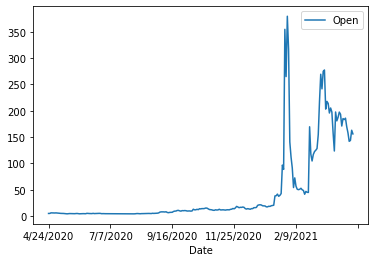

In [24]:
df_stock_GME.plot( x= 'Date', y = 'Open')
pyplot.show()

## Explore Sentiment Data

In [8]:
#load csv into dataframe
df_reddit = pd.read_csv('posts_with_scores_and_ticker.csv')

In [9]:
df_reddit.shape

(111600, 13)

In [16]:
df_reddit.head(2)

,author,timestamp,id,score,text,scores,compound_score,sentiment,AMC,NAKD,BB,GME,KOSS
0,WTCwrnr,"2021-03-17, 10:11:46",m75ago,1,*Processing img uzcczofdfmn61...*\n\nCan we he...,"{'neg': 0.02, 'neu': 0.831, 'pos': 0.149, 'com...",0.9033,pos,False,False,False,False,False
1,aresvswrld,"2021-03-17, 10:11:24",m75a5u,1,"I currently use Robinhood, and I have been for...","{'neg': 0.048, 'neu': 0.891, 'pos': 0.061, 'co...",0.1531,pos,False,False,False,True,False


In [33]:
min(df_reddit['timestamp'])

'2020-08-14, 16:32:54'

In [34]:
max(df_reddit['timestamp'])

'2021-03-17, 10:11:46'

In [46]:
df_reddit.dtypes

author             object
timestamp          object
id                 object
score               int64
text               object
scores             object
compound_score    float64
sentiment          object
AMC                  bool
NAKD                 bool
BB                   bool
GME                  bool
KOSS                 bool
dtype: object

In [17]:
#create df only for GME
df_reddit_GME = df_reddit[df_reddit.GME == True]

In [18]:
df_reddit_GME.shape

(24213, 13)

In [62]:
df_reddit_GME.dtypes

author             object
timestamp          object
id                 object
score               int64
text               object
scores             object
compound_score    float64
sentiment          object
AMC                  bool
NAKD                 bool
BB                   bool
GME                  bool
KOSS                 bool
dtype: object

In [59]:
# save only date from the date time
df_reddit_GME['timestamp'] = df_reddit_GME['timestamp'].dt.date

C:\Users\itkse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
# convert timestamp into date time
df_reddit_GME['timestamp'] = pd.to_datetime(df_reddit_GME['timestamp'], errors='coerce')

C:\Users\itkse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
df_reddit_GME.head(2)

,author,timestamp,id,score,text,scores,compound_score,sentiment,AMC,NAKD,BB,GME,KOSS
1,aresvswrld,2021-03-17,m75a5u,1,"I currently use Robinhood, and I have been for...","{'neg': 0.048, 'neu': 0.891, 'pos': 0.061, 'co...",0.1531,pos,False,False,False,True,False
15,bosshax,2021-03-17,m74p9p,1,**Short Interest report from S3 Partners updat...,"{'neg': 0.08, 'neu': 0.815, 'pos': 0.104, 'com...",0.8865,pos,True,False,True,True,False


In [61]:
max(df_reddit_GME['timestamp'])

datetime.date(2021, 3, 17)

In [60]:
min(df_reddit_GME['timestamp'])

datetime.date(2020, 8, 19)

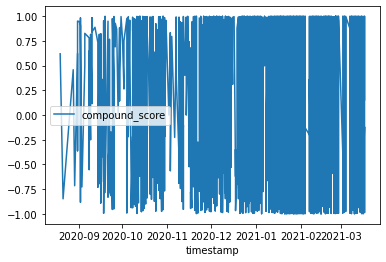

In [64]:
df_reddit_GME.plot(x = 'timestamp', y = 'compound_score')
pyplot.show()